In [21]:
import pandas as pd
answers = pd.read_csv("Data/Questions about gaze-based interaction (1-52).csv", decimal=",", sep=";")
answers.loc[answers["Do you wear glasses?"]=="Yes", "Additional comments"]

0                                         Kontaktlinsen
3                       improve movement pattern shown.
16                                                  NaN
18                  Stehen auf Dauer etwas anstrengend.
20                                                  NaN
21                                        Kontaktlinsen
30                                       contact lenses
31                                       Contact lenses
34    gaze ist am Einfachsten, Nicken ist auch gut, ...
37                                                  NaN
42                                       Contact lenses
44                                                  NaN
51                                                  NaN
Name: Additional comments, dtype: object

In [22]:
import numpy as np
pat_meta_data = dict()
for _, row in answers.iterrows():
    pat_data = {
        "Age": row["Age"],
        "Gender": row["Gender"],
        "VRExperience": "Yes" in row["Experience with virtual reality"],
        "ETExperience": "Yes" in row["Experience with eye tracking"],
        "PreferedMethod": row["Which method do you prefer?"]
    }
    contact_lens_comments = ["kontaktlinsen", "contact lenses", "Kontaktlinsen", "Contact lenses"]

    if row["Do you wear glasses?"] == "Yes":
        comment = row["Additional comments"]
        if pd.isnull(comment):
            pat_data["VisualAid"] = "Glasses"
        else:
            if any([x in row["Additional comments"] for x in contact_lens_comments]):
                pat_data["VisualAid"] = "ContactLenses"
            else:
                pat_data["VisualAid"] = "Glasses"
    else:
        pat_data["VisualAid"] = "No"
    pat_meta_data[row["Participant name"]] = pat_data
pat_meta_data = pd.DataFrame(pat_meta_data).transpose()
pat_meta_data

,Age,Gender,VRExperience,ETExperience,PreferedMethod,VisualAid
Pat001,24,Female,False,True,Gaze,ContactLenses
Pat002,25,Female,True,True,Nod,No
Pat003,20,Male,True,False,Head and gaze,No
Pat004,32,Male,False,False,Head and gaze,Glasses
Pat005,34,Female,True,True,Head and gaze,No
Pat006,20,Male,False,False,Nod,No
Pat007,38,Male,True,False,Nod,No
Pat008,19,Male,False,False,Gaze,No
Pat009,22,Female,False,False,Head and gaze,No
Pat010,19,Male,False,False,Nod,No


In [23]:
def get_count(x):
    unique, counts = np.unique(x, return_counts=True)
    return dict(zip(unique, counts))



In [28]:
summarized_data = {"General": dict(), "Female": dict(), "Male": dict(), "NonBinary": dict(), "NotSayGender": dict()}
def add_data(name, value_general, value_female, value_male, value_nonbinary, value_notSayGender):
    for c, v in zip(["General", "Female", "Male", "NonBinary", "NotSayGender"], [value_general, value_female, value_male, value_nonbinary, value_notSayGender]):
        summarized_data[c][name] = v
# Generel
print(f"Count of pats {len(pat_meta_data)}")

# Gender
print("\nGender Info")
gender_col = pat_meta_data["Gender"].to_numpy()
female = gender_col == "Female"
male = gender_col == "Male"
nonBinary = gender_col == "Non-binary"
notSayGender = gender_col == "Prefer not to say"
pat_count = len(gender_col)
female_count = np.sum(female)
male_count = np.sum(male)
nonBinary_count = np.sum(nonBinary)
notSayGender_count = np.sum(notSayGender)
print(f"{female_count=}; {male_count=}; {nonBinary_count=}; {notSayGender_count=}")

add_data("Count", len(pat_meta_data), female_count, male_count, nonBinary_count, notSayGender_count)

# Age
print("\nAge Info")
age_col = pat_meta_data["Age"].to_numpy()
mean_age = np.mean(age_col)
female_age = np.mean(age_col[female])
male_age = np.mean(age_col[male])
nonBinary_age = np.mean(age_col[nonBinary])
notSayGender_age = np.mean(age_col[notSayGender])
print(f"{mean_age=:.2f}; {female_age=:.2f}; {male_age=:.2f}; {nonBinary_age=:.2f}; {notSayGender_age=:.2f}")
print(f"{np.min(age_col)=}; {np.max(age_col)=}")
print(f"{np.min(age_col[female])=}; {np.max(age_col[female])=}")
print(f"{np.min(age_col[male])=}; {np.max(age_col[male])=}")

add_data("Mean age", mean_age, female_age, male_age, nonBinary_age, notSayGender_age)
add_data("Minimal age", np.min(age_col), np.min(age_col[female]), np.min(age_col[male]), np.min(age_col[nonBinary]), np.min(age_col[notSayGender]))
add_data("Maximal age", np.max(age_col), np.max(age_col[female]), np.max(age_col[male]), np.max(age_col[nonBinary]), np.max(age_col[notSayGender]))

# VR Exp
print("\nVR experience")
vr_col = pat_meta_data["VRExperience"].to_numpy()
vr_exp_count = np.sum(vr_col)
vr_exp_female_count = np.sum(vr_col[female])
vr_exp_male_count = np.sum(vr_col[male])
vr_exp_nonBinary_count = np.sum(vr_col[nonBinary])
vr_exp_notSayGender_count = np.sum(vr_col[notSayGender])
print(f"{vr_exp_count=}; {vr_exp_female_count=}; {vr_exp_male_count=}; {vr_exp_nonBinary_count=}; {vr_exp_notSayGender_count=}")

add_data("VR Experience", vr_exp_count, vr_exp_female_count, vr_exp_male_count, vr_exp_nonBinary_count, vr_exp_notSayGender_count)

# ET Exp
print("\nET experience")
et_col = pat_meta_data["ETExperience"].to_numpy()
et_exp_count = np.sum(et_col)
et_exp_female_count = np.sum(et_col[female])
et_exp_male_count = np.sum(et_col[male])
et_exp_nonBinary_count = np.sum(et_col[nonBinary])
et_exp_notSayGender_count = np.sum(et_col[notSayGender])
print(f"{et_exp_count=}; {et_exp_female_count=}; {et_exp_male_count=}; {et_exp_nonBinary_count=}; {et_exp_notSayGender_count=}")

add_data("ET Experience", et_exp_count, et_exp_female_count, et_exp_male_count, et_exp_nonBinary_count, et_exp_notSayGender_count)

# Visual Aid
print("\nVisual Aid")
visAid_col = pat_meta_data["VisualAid"].to_numpy()
visAid_count = get_count(visAid_col)
visAid_female_count = get_count(visAid_col[female])
visAid_male_count = get_count(visAid_col[male])
print(f"{(visAid_count)=}")
print(f"{visAid_female_count=}")
print(f"{visAid_male_count=}")

# Prefered method
prefered_method = dict()
print("\nPrefered method")
method_col = pat_meta_data["PreferedMethod"].to_numpy()
generel_prefered = get_count(method_col)
female_prefered = get_count(method_col[female])
male_prefered = get_count(method_col[male])
nonBinaray_preferred = get_count(method_col[nonBinary])
notSayGender_preferred = get_count(method_col[notSayGender])
print(f"{generel_prefered=}")
prefered_method["General"] = generel_prefered
print(f"{female_prefered=}")
prefered_method["Female"] = female_prefered
print(f"{male_prefered=}")
prefered_method["Male"] = male_prefered
print(f"{nonBinaray_preferred=}")
prefered_method["NonBinary"] = nonBinaray_preferred
print(f"{notSayGender_preferred=}")
prefered_method["NotSayGender"] = notSayGender_preferred

Count of pats 52

Gender Info
female_count=32; male_count=18; nonBinary_count=1; notSayGender_count=1

Age Info
mean_age=26.63; female_age=26.31; male_age=27.56; nonBinary_age=24.00; notSayGender_age=23.00
np.min(age_col)=18; np.max(age_col)=67
np.min(age_col[female])=18; np.max(age_col[female])=63
np.min(age_col[male])=18; np.max(age_col[male])=67

VR experience
vr_exp_count=25; vr_exp_female_count=15; vr_exp_male_count=10; vr_exp_nonBinary_count=False; vr_exp_notSayGender_count=False

ET experience
et_exp_count=14; et_exp_female_count=11; et_exp_male_count=2; et_exp_nonBinary_count=True; et_exp_notSayGender_count=False

Visual Aid
(visAid_count)={'ContactLenses': 5, 'Glasses': 8, 'No': 39}
visAid_female_count={'ContactLenses': 5, 'Glasses': 5, 'No': 22}
visAid_male_count={'Glasses': 2, 'No': 16}

Prefered method
generel_prefered={'Gaze': 13, 'Head and gaze': 15, 'Nod': 21, 'Smooth pursuit': 3}
female_prefered={'Gaze': 10, 'Head and gaze': 6, 'Nod': 13, 'Smooth pursuit': 3}
male_prefe

In [33]:
summarized_df = pd.DataFrame(summarized_data).round(2).transpose()
summarized_df["Count"] = summarized_df["Count"].astype(int)
summarized_df["VR Experience"] = summarized_df["VR Experience"].astype(int)
summarized_df["ET Experience"] = summarized_df["ET Experience"].astype(int)
summarized_df["Minimal age"] = summarized_df["Minimal age"].astype(int)
summarized_df["Maximal age"] = summarized_df["Maximal age"].astype(int)
print(summarized_df.to_latex())
# print(pd.DataFrame(summarized_data).round(2).transpose().to_latex(float_format="%.2f"))

C:\Users\Bjoern\AppData\Local\Temp\ipykernel_12816\2769609810.py:7: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(summarized_df.to_latex())


\begin{tabular}{lrlrrrr}
\toprule
{} &  Count & Mean age &  Minimal age &  Maximal age &  VR Experience &  ET Experience \\
\midrule
General      &     52 &    26.63 &           18 &           67 &             25 &             14 \\
Female       &     32 &    26.31 &           18 &           63 &             15 &             11 \\
Male         &     18 &    27.56 &           18 &           67 &             10 &              2 \\
NonBinary    &      1 &     24.0 &           24 &           24 &              0 &              1 \\
NotSayGender &      1 &     23.0 &           23 &           23 &              0 &              0 \\
\bottomrule
\end{tabular}



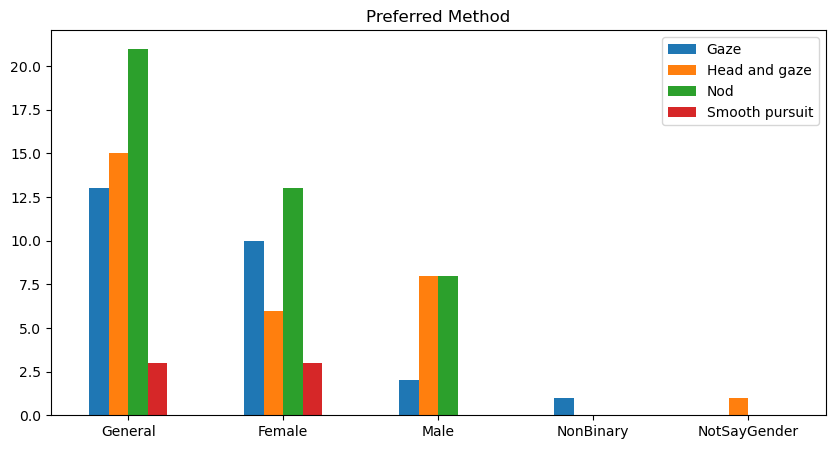

,Gaze,Head and gaze,Nod,Smooth pursuit
General,13,15,21,3
Female,10,6,13,3
Male,2,8,8,0
NonBinary,1,0,0,0
NotSayGender,0,1,0,0


\begin{tabular}{lrrrr}
\toprule
{} &  Gaze &  Head and gaze &  Nod &  Smooth pursuit \\
\midrule
General      &    13 &             15 &   21 &               3 \\
Female       &    10 &              6 &   13 &               3 \\
Male         &     2 &              8 &    8 &               0 \\
NonBinary    &     1 &              0 &    0 &               0 \\
NotSayGender &     0 &              1 &    0 &               0 \\
\bottomrule
\end{tabular}



C:\Users\Bjoern\AppData\Local\Temp\ipykernel_12816\2882374043.py:10: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(prefered_method_df.to_latex())


In [34]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 5))
prefered_method_df = pd.DataFrame(prefered_method).transpose()
prefered_method_df.fillna(0, inplace=True)
prefered_method_df = prefered_method_df.astype(int)
prefered_method_df.plot(kind="bar", title="Preferred Method", ax=ax, rot=0)
plt.savefig("Pictures/preferred_method.png")
plt.show()
display(prefered_method_df)
print(prefered_method_df.to_latex())

In [35]:
pat_meta_data.to_csv("Data/Dataset/pat_data.csv", sep="\t", decimal=",")